# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [333]:

df_descr = pd.read_csv('otp_description.csv', sep='\t', encoding='utf8')

In [334]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [335]:
df_train = pd.read_csv('otp_train.csv', sep='\t', encoding='utf8')

In [336]:
df_train.shape

(15223, 52)

In [337]:
df_train.head(20)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN
5,59911784,0,29,1,0,0,0,0,Среднее,Гражданский брак,...,0,1,2,1,11,0,0,0,0,NaN
6,59911832,0,35,1,0,0,1,1,Высшее,Разведен(а),...,0,1,2,2,14,0,0,0,0,NaN
7,59912034,0,41,1,0,1,0,0,Среднее,Состою в браке,...,1,1,2,1,11,0,0,0,0,NaN
8,59912560,0,53,1,0,0,2,0,Высшее,Состою в браке,...,0,1,1,1,3,0,0,0,0,NaN
9,59912659,0,43,1,0,1,0,0,Среднее специальное,Состою в браке,...,0,1,1,1,6,0,0,0,0,NaN


In [338]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

In [339]:
df_test = pd.read_csv('otp_test.csv', sep='\t', encoding='utf8')

In [340]:
df_test.shape

(14910, 52)

In [341]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [342]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [343]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [344]:
df = df_test.append(df_train).reset_index(drop=True)

In [345]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [347]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Неполное среднее', 'Среднее специальное', 'Неоконченное высшее', 'Ученая степень', 'Среднее', 'Два и более высших образования'}


MARITAL_STATUS
{'Гражданский брак', 'Состою в браке', 'Разведен(а)', 'Не состоял в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{'Торговля', nan, 'Туризм', 'Транспорт', 'Недвижимость', 'Банк/Финансы', 'Другие сферы', 'Образование', 'Информационные услуги', 'Химия/Парфюмерия/Фармацевтика', 'Маркетинг', 'Логистика', 'Коммунальное хоз-во/Дорожные службы', 'Салоны красоты и здоровья', 'Управляющая компания', 'Здравоохранение', 'Подбор персонала', 'Юридические услуги/нотариальные услуги', 'Сельское хозяйство', 'Строительство', 'Развлечения/Искусство', 'Наука', 'СМИ/Реклама/PR-агенства', 'Ресторанный бизнес/Общественное питание', 'Страхование', 'Энергетика', 'Нефтегазовая промышленность', 'ЧОП/Детективная д-ть', 'Металлургия/Промышленность/Машиностроение', 'Информационные технологии', 'Государственная служба', 'Сборочные производства'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [348]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [349]:
# пропуски есть в тех столбцах, где количество строк менее 30133
# GEN_INDUSTRY, GEN_TITLE, REGION_NM, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, TP_PROVINCE, WORK_TIME, 
# PREVIOUS_CARD_NUM_UTILIZED с пропусками
# при беглом анализе большинство столбцов имеют признаки классификации (см. пункт 2), кроме столбцов PREVIOUS_CARD_NUM_UTILIZED и WORK_TIME
# в условиях сказано, что PREVIOUS_CARD_NUM_UTILIZE это количество уже утилизированных карт ( если пусто - 0). 
# Соответственно, вместо пропусков необходимо подставить нули.
# Такую же операцию сделаем со столбцом Work_time (я полагаю, что если там пропуск, то человек только устроился на работу)
# Заменим пропуски на 0:

df['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace = True)
df['WORK_TIME'].fillna(0,inplace = True)
df.info()

# df = df.drop(['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Под категориальные признаки, мне кажется, попадают следующие колонки

EDUCATION
{'Среднее', 'Два и более высших образования', 'Неоконченное высшее', 'Неполное среднее', 'Среднее специальное', 'Ученая степень', 'Высшее'}

MARITAL_STATUS
{'Вдовец/Вдова', 'Гражданский брак', 'Не состоял в браке', 'Состою в браке', 'Разведен(а)'}

GEN_TITLE
{nan, 'Высококвалифиц. специалист', 'Рабочий', 'Руководитель низшего звена', 'Работник сферы услуг', 'Индивидуальный предприниматель', 'Другое', 'Руководитель высшего звена', 'Руководитель среднего звена', 'Специалист', 'Военнослужащий по контракту', 'Служащий', 'Партнер'}

ORG_TP_STATE
{'Государственная комп./учреж.', nan, 'Частная ком. с инос. капиталом', 'Некоммерческая организация', 'Индивидуальный предприниматель', 'Частная компания'}

ORG_TP_FCAPITAL
#{nan, 'Без участия', 'С участием'}

JOB_DIR
#{nan, 'Адм-хоз. и трансп. службы', 'Участие в основ. деятельности', 'Пр-техн. обесп. и телеком.', 'Вспомогательный техперсонал', 'Служба безопасности', 'Бухгалтерия, финансы, планир.', 'Юридическая служба', 'Снабжение и сбыт', 'Реклама и маркетинг', 'Кадровая служба и секретариат'}

FAMILY_INCOME
{'от 5000 до 10000 руб.', 'до 5000 руб.', 'свыше 50000 руб.', 'от 20000 до 50000 руб.', 'от 10000 до 20000 руб.'
 
и Столбцы с географией (REG_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE, TP_PROVINCE, REGION_NM)

Однако, мне кажется, что не все столбцы имеют вес для выборки.
Полагаю, что данные об индустрии JOB_DIR, о форме собственности ORG_TP_STATE, о том есть ли иностранный капитал или нет ORG_TP_FCAPITAL, а также столбцы с георгафией нужно удалить из выборки.  

Также под сомнение попадают столбцы по должности

Оставшиеся столбцы приведем к правильному виду c помощью функции get_dummies

Update
провел очень много тестов, в итоге "наилучшего" результата удалось добиться следующей функцией, которая удаляет очень много столбцов. Мне кажется, что в данной выборке много лишней информации, которая не влияет на TARGET:

def preproc_data(df_input):

    df_input['GEN_TITLE'].fillna(0,inplace = True)
    
    df_input['FST_PAYMENT'] = [x.replace(',', '.') for x in df_input['FST_PAYMENT']]
    
    df_input['FST_PAYMENT'] = df_input['FST_PAYMENT'].astype(float)
    
    df_input['LOAN_AVG_DLQ_AMT'] = [x.replace(',', '.') for x in df_input['LOAN_AVG_DLQ_AMT']]
    
    df_input['LOAN_AVG_DLQ_AMT'] = df_input['LOAN_AVG_DLQ_AMT'].astype(float)
    
    df_input['LOAN_MAX_DLQ_AMT'] = [x.replace(',', '.') for x in df_input['LOAN_MAX_DLQ_AMT']]
    
    df_input['LOAN_MAX_DLQ_AMT'] = df_input['LOAN_MAX_DLQ_AMT'].astype(float)
    
    df_input['CREDIT'] = [x.replace(',', '.') for x in df_input['CREDIT']]
    
    df_input['CREDIT'] = df_input['CREDIT'].astype(float)
    
    df_input['PERSONAL_INCOME'] = [x.replace(',', '.') for x in df_input['PERSONAL_INCOME']]
    
    df_input['PERSONAL_INCOME'] = df_input['PERSONAL_INCOME'].astype(float)
    
    df_input.drop(['AGREEMENT_RK'], 1, inplace=True)
    
    df_input.drop(['REG_ADDRESS_PROVINCE'], 1, inplace=True)
    
    df_input.drop(['FACT_ADDRESS_PROVINCE'], 1, inplace=True)
    
    df_input.drop(['POSTAL_ADDRESS_PROVINCE'], 1, inplace=True)
    
    df_input.drop(['TP_PROVINCE'], 1, inplace=True)
    
    df_input.drop(['REGION_NM'], 1, inplace=True)
    
    df_input.drop(['ORG_TP_STATE'], 1, inplace = True)
    
    df_input.drop(['ORG_TP_FCAPITAL'], 1, inplace = True)
    
    df_input.drop(['JOB_DIR'], 1, inplace = True)
    
    df_input.drop(['GEN_INDUSTRY'], 1, inplace = True)
    
    df_input.drop(['GEN_TITLE'], 1, inplace = True)
    
    df_input.drop(['DL_DOCUMENT_FL'], 1, inplace = True)
    
    df_input.drop(['GPF_DOCUMENT_FL'], 1, inplace = True)
    
    df_input.drop(['LOAN_MAX_DLQ'], 1, inplace = True)
    
    df_input.drop(['REG_FACT_FL'], 1, inplace = True)
    
    df_input.drop(['FACT_POST_FL'], 1, inplace = True)
    
    df_input.drop(['REG_FACT_POST_FL'], 1, inplace = True)
    
    df_input.drop(['REG_FACT_POST_TP_FL'], 1, inplace = True)
    
    df_input.drop(['FACT_LIVING_TERM'], 1, inplace = True)
    
    df_input.drop(['SOCSTATUS_WORK_FL'], 1, inplace = True)
    
    df_input.drop(['SOCSTATUS_PENS_FL'], 1, inplace = True)
    
    df_input = pd.get_dummies(df, columns=['EDUCATION', 'MARITAL_STATUS', 'FAMILY_INCOME']);
    
    df_output = df_input.copy()
    
    return df_output
    


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [350]:
print(df.columns.tolist())

['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'OWN_AUTO', 'AUTO_RUS_FL', 'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'CREDIT', 'TERM', 'FST_PAYMENT', 'DL_DOCUMENT_FL', 'GPF_DOCUMENT_FL', 'FACT_LIVING_TERM', 'WORK_TIME', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_NUM_PAYM', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', 'PREVIOUS_CARD_NUM_UTILIZED', 'sample']


In [351]:
df['PERSONAL_INCOME'].head()

0     7000
1     4100
2    40000
3    20000
4    17000
Name: PERSONAL_INCOME, dtype: object

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [353]:
def preproc_data(df_input):
    #df_input['TP_PROVINCE'].fillna(0,inplace = True)
    df_input['GEN_TITLE'].fillna(0,inplace = True)
    #df_input['REGION_NM'].fillna(0,inplace = True)
    df_input['FST_PAYMENT'] = [x.replace(',', '.') for x in df_input['FST_PAYMENT']]
    df_input['FST_PAYMENT'] = df_input['FST_PAYMENT'].astype(float)
    df_input['LOAN_AVG_DLQ_AMT'] = [x.replace(',', '.') for x in df_input['LOAN_AVG_DLQ_AMT']]
    df_input['LOAN_AVG_DLQ_AMT'] = df_input['LOAN_AVG_DLQ_AMT'].astype(float)
    df_input['LOAN_MAX_DLQ_AMT'] = [x.replace(',', '.') for x in df_input['LOAN_MAX_DLQ_AMT']]
    df_input['LOAN_MAX_DLQ_AMT'] = df_input['LOAN_MAX_DLQ_AMT'].astype(float)
    df_input['CREDIT'] = [x.replace(',', '.') for x in df_input['CREDIT']]
    df_input['CREDIT'] = df_input['CREDIT'].astype(float)
    df_input['PERSONAL_INCOME'] = [x.replace(',', '.') for x in df_input['PERSONAL_INCOME']]
    df_input['PERSONAL_INCOME'] = df_input['PERSONAL_INCOME'].astype(float)
    #df_input['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float');
    df_input.drop(['AGREEMENT_RK'], 1, inplace=True)
    df_input.drop(['REG_ADDRESS_PROVINCE'], 1, inplace=True)
    df_input.drop(['FACT_ADDRESS_PROVINCE'], 1, inplace=True)
    df_input.drop(['POSTAL_ADDRESS_PROVINCE'], 1, inplace=True)
    df_input.drop(['TP_PROVINCE'], 1, inplace=True)
    df_input.drop(['REGION_NM'], 1, inplace=True)
    df_input.drop(['ORG_TP_STATE'], 1, inplace = True)
    df_input.drop(['ORG_TP_FCAPITAL'], 1, inplace = True)
    df_input.drop(['JOB_DIR'], 1, inplace = True)
    df_input.drop(['GEN_INDUSTRY'], 1, inplace = True)
    df_input.drop(['GEN_TITLE'], 1, inplace = True)
    df_input.drop(['DL_DOCUMENT_FL'], 1, inplace = True)
    df_input.drop(['GPF_DOCUMENT_FL'], 1, inplace = True)
    df_input.drop(['LOAN_MAX_DLQ'], 1, inplace = True)
    df_input.drop(['REG_FACT_FL'], 1, inplace = True)
    df_input.drop(['FACT_POST_FL'], 1, inplace = True)
    df_input.drop(['REG_FACT_POST_FL'], 1, inplace = True)
    df_input.drop(['REG_FACT_POST_TP_FL'], 1, inplace = True)
    #df_input.drop(['EDUCATION'], 1, inplace = True)
    #df_input.drop(['AUTO_RUS_FL'], 1, inplace = True)
    #df_input.drop(['HS_PRESENCE_FL'], 1, inplace = True)
    #df_input.drop(['COT_PRESENCE_FL'], 1, inplace = True)
    #df_input.drop(['GAR_PRESENCE_FL'], 1, inplace = True)
    #df_input.drop(['LAND_PRESENCE_FL'], 1, inplace = True)
    df_input.drop(['FACT_LIVING_TERM'], 1, inplace = True)
    df_input.drop(['SOCSTATUS_WORK_FL'], 1, inplace = True)
    df_input.drop(['SOCSTATUS_PENS_FL'], 1, inplace = True)
    #df_input = pd.get_dummies(df, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'FAMILY_INCOME', 'PERSONAL_INCOME']);
    df_input = pd.get_dummies(df, columns=['EDUCATION', 'MARITAL_STATUS', 'FAMILY_INCOME']);
    df_output = df_input.copy()
    return df_output


In [354]:
df_preproc = df.pipe(preproc_data)
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [355]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Data columns (total 45 columns):
TARGET                                      15223 non-null int64
AGE                                         15223 non-null int64
GENDER                                      15223 non-null int64
CHILD_TOTAL                                 15223 non-null int64
DEPENDANTS                                  15223 non-null int64
PERSONAL_INCOME                             15223 non-null float64
REG_POST_FL                                 15223 non-null int64
FL_PRESENCE_FL                              15223 non-null int64
OWN_AUTO                                    15223 non-null int64
AUTO_RUS_FL                                 15223 non-null int64
HS_PRESENCE_FL                              15223 non-null int64
COT_PRESENCE_FL                             15223 non-null int64
GAR_PRESENCE_FL                             15223 non-null int64
LAND_PRESENCE_FL                        

In [356]:
df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Data columns (total 45 columns):
TARGET                                      14910 non-null int64
AGE                                         14910 non-null int64
GENDER                                      14910 non-null int64
CHILD_TOTAL                                 14910 non-null int64
DEPENDANTS                                  14910 non-null int64
PERSONAL_INCOME                             14910 non-null float64
REG_POST_FL                                 14910 non-null int64
FL_PRESENCE_FL                              14910 non-null int64
OWN_AUTO                                    14910 non-null int64
AUTO_RUS_FL                                 14910 non-null int64
HS_PRESENCE_FL                              14910 non-null int64
COT_PRESENCE_FL                             14910 non-null int64
GAR_PRESENCE_FL                             14910 non-null int64
LAND_PRESENCE_FL                            

In [357]:
df_train_preproc.head()

,TARGET,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_POST_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,...,MARITAL_STATUS_Вдовец/Вдова,MARITAL_STATUS_Гражданский брак,MARITAL_STATUS_Не состоял в браке,MARITAL_STATUS_Разведен(а),MARITAL_STATUS_Состою в браке,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.
14910,0,49,1,2,1,5000.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
14911,0,32,1,3,3,12000.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
14912,0,52,1,4,0,9000.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
14913,0,39,1,1,1,25000.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
14914,0,30,0,0,0,12000.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [358]:
y = df_train_preproc['TARGET']

In [359]:
y

14910    0
14911    0
14912    0
14913    0
14914    0
14915    0
14916    0
14917    0
14918    0
14919    0
14920    0
14921    1
14922    1
14923    0
14924    0
14925    1
14926    0
14927    0
14928    1
14929    0
14930    0
14931    0
14932    0
14933    0
14934    0
14935    0
14936    0
14937    1
14938    0
14939    0
        ..
30103    0
30104    0
30105    0
30106    0
30107    0
30108    0
30109    0
30110    1
30111    0
30112    0
30113    0
30114    1
30115    0
30116    0
30117    0
30118    0
30119    1
30120    0
30121    0
30122    0
30123    1
30124    0
30125    0
30126    0
30127    0
30128    0
30129    0
30130    0
30131    0
30132    0
Name: TARGET, Length: 15223, dtype: int64

In [360]:
df_train_preproc.drop(['TARGET'], axis=1, inplace=True)

In [361]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Data columns (total 44 columns):
AGE                                         15223 non-null int64
GENDER                                      15223 non-null int64
CHILD_TOTAL                                 15223 non-null int64
DEPENDANTS                                  15223 non-null int64
PERSONAL_INCOME                             15223 non-null float64
REG_POST_FL                                 15223 non-null int64
FL_PRESENCE_FL                              15223 non-null int64
OWN_AUTO                                    15223 non-null int64
AUTO_RUS_FL                                 15223 non-null int64
HS_PRESENCE_FL                              15223 non-null int64
COT_PRESENCE_FL                             15223 non-null int64
GAR_PRESENCE_FL                             15223 non-null int64
LAND_PRESENCE_FL                            15223 non-null int64
CREDIT                                  

In [362]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(df_train_preproc, y)
predict = dtc.predict(df_train_preproc)

In [363]:
from sklearn.cross_validation import train_test_split
import numpy as np

# X_train, X_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.33, random_state=42)

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(df_train_preproc, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[7.87438173e-02 2.13319314e-02 4.60531061e-02 3.75310570e-02
 7.67483714e-02 1.06992499e-02 2.40094143e-02 1.29816812e-02
 9.23871865e-03 2.09451529e-02 3.23290609e-03 3.08419508e-03
 9.41958359e-03 7.93024529e-02 6.25788003e-02 7.48231154e-02
 7.14028166e-02 1.92544535e-02 1.02911618e-02 5.15422438e-03
 2.20938291e-02 3.43456190e-02 6.24208593e-02 1.72449021e-02
 2.07416146e-02 1.85690896e-02 9.76103244e-03 1.28314356e-02
 7.92776123e-04 6.37322751e-03 5.56162419e-03 1.47061798e-02
 1.86427685e-02 3.35370103e-05 4.35304399e-03 4.44155434e-03
 1.23544363e-02 9.68761689e-03 1.28666181e-02 1.18324551e-03
 1.07046065e-02 1.09642140e-02 6.70512839e-03 5.79483141e-03]


#### Задание 5. Обучение и оценка качества разных моделей

In [364]:
from sklearn.cross_validation import train_test_split

# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.33, random_state=42)

In [365]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

In [366]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

DecisionTreeClassifier

In [367]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))

precision 0.1777456647398844
recall 0.20163934426229507
accuracy 0.7898089171974523


In [368]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_proba_dtc = dtc.predict_proba(X_test)

In [369]:
predict_proba_dtc[:,1]

array([0., 0., 0., ..., 0., 1., 0.])

In [370]:
from sklearn.metrics import precision_recall_curve
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(y_test, predict_proba_dtc[:,1])

(-0.01, 1.01)

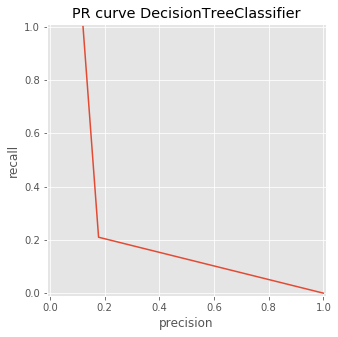

In [371]:
%matplotlib inline
from matplotlib import pyplot as plt
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(y_test, predict_proba_dtc[:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision_dtc, recall_dtc)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve DecisionTreeClassifier')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

RandomForestClassifier

In [372]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)
# predict = rfc.predict_proba(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))

precision 0.35135135135135137
recall 0.021311475409836064
accuracy 0.8763933121019108


In [373]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_proba_rfc = rfc.predict_proba(X_test)

In [374]:
predict_proba_rfc[:,1]

array([0.2, 0.1, 0.3, ..., 0. , 0.1, 0. ])

In [375]:
from sklearn.metrics import precision_recall_curve
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test, predict_proba_rfc[:,1])

(-0.01, 1.01)

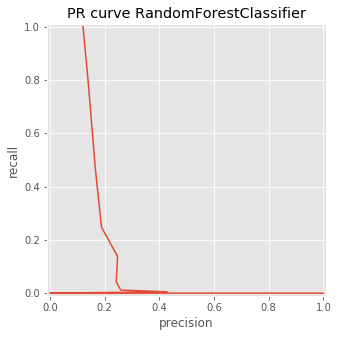

In [376]:
%matplotlib inline
from matplotlib import pyplot as plt
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test, predict_proba_rfc[:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision_rfc, recall_rfc)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve RandomForestClassifier')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

LogisticRegression

In [377]:
from sklearn.linear_model import LogisticRegression
lrn = LogisticRegression()
lrn.fit(X_train, y_train)
predict = lrn.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))

precision 0.42857142857142855
recall 0.004918032786885246
accuracy 0.8783837579617835


In [378]:
lrn = LogisticRegression()
lrn.fit(X_train, y_train)
predict_proba_lrn = lrn.predict_proba(X_test)

In [379]:
predict_proba_lrn[:,1]

array([0.28114409, 0.06142187, 0.21166086, ..., 0.04179061, 0.06056794,
       0.14258814])

In [380]:
from sklearn.metrics import precision_recall_curve
precision_lrn, recall_lrn, thresholds_lrn = precision_recall_curve(y_test, predict_proba_lrn[:,1])

(-0.01, 1.01)

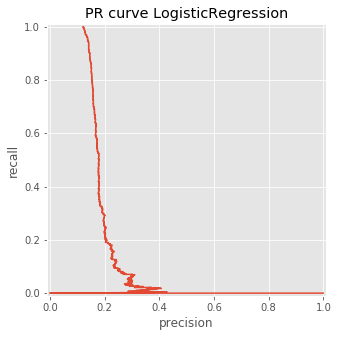

In [381]:
%matplotlib inline
from matplotlib import pyplot as plt
precision_lrn, recall_lrn, thresholds_lrn = precision_recall_curve(y_test, predict_proba_lrn[:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision_lrn, recall_lrn)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve LogisticRegression')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [382]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

Совмещение графиков

(-0.01, 1.01)

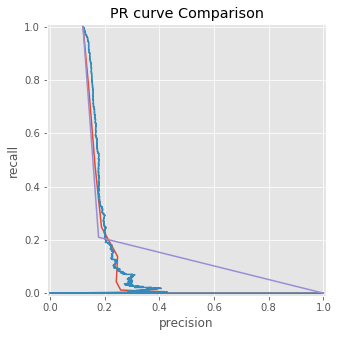

In [383]:
%matplotlib inline
from matplotlib import pyplot as plt
precision_lrn, recall_lrn, thresholds_lrn = precision_recall_curve(y_test, predict_proba_lrn[:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision_rfc, recall_rfc)
plt.plot(precision_lrn, recall_lrn)
plt.plot(precision_dtc, recall_dtc)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve Comparison')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

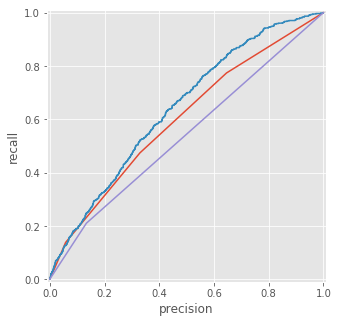

In [384]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
precision_lrn, recall_lrn, thresholds_lrn = roc_curve(y_test, predict_proba_lrn[:,1])
precision_rfc, recall_rfc, thresholds_rfc = roc_curve(y_test, predict_proba_rfc[:,1])
precision_dtc, recall_dtc, thresholds_dtc = roc_curve(y_test, predict_proba_dtc[:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision_rfc, recall_rfc)
plt.plot(precision_lrn, recall_lrn)
plt.plot(precision_dtc, recall_dtc)
plt.ylabel('recall')
plt.xlabel('precision')              
plt.grid(True)
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [385]:
print ("Logistic Regression ROC AUC SCORE =", roc_auc_score(y_test, predict_proba_lrn[:,1])) 

Logistic Regression ROC AUC SCORE = 0.640272382211592


In [386]:
print ('RandomForestClassifier ROC AUC SCORE =', roc_auc_score(y_test, predict_proba_rfc[:,1]))

RandomForestClassifier ROC AUC SCORE = 0.5983716119351987


In [387]:
print ('DecisionTreeClassifier ROC AUC SCORE =', roc_auc_score(y_test, predict_proba_dtc[:,1]))

DecisionTreeClassifier ROC AUC SCORE = 0.5380852280746062


In [388]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here

In [389]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here

cross_val_score(
    rfc, 
    df_train_preproc, 
    y, 
    scoring='roc_auc', 
    cv=10
)

array([0.57320139, 0.54231097, 0.62282621, 0.61055698, 0.59927448,
       0.61363458, 0.5699445 , 0.62553096, 0.60274348, 0.61444004])

In [390]:
cross_val_score(
    dtc, 
    df_train_preproc, 
    y, 
    scoring='roc_auc', 
    cv=10
)

array([0.54050048, 0.53816448, 0.51718228, 0.52031757, 0.54556878,
       0.52524915, 0.51403051, 0.53097795, 0.53540073, 0.552789  ])

In [391]:
cross_val_score(
    lrn, 
    df_train_preproc, 
    y, 
    scoring='roc_auc', 
    cv=10
)

array([0.65135684, 0.61597053, 0.63892288, 0.63982927, 0.64561369,
       0.5870279 , 0.62415695, 0.65847619, 0.62856531, 0.64251548])

In [392]:
# И посчитать средний roc_auc

In [393]:
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
averageROC_AUC = cross_val_score(
    lrn, 
    df_train_preproc, 
    y, 
    scoring='roc_auc', 
    cv=10
)
averageROC_AUC.mean()

0.6332435047026603

In [394]:
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
averageROC_AUC = cross_val_score(
    rfc, 
    df_train_preproc, 
    y, 
    scoring='roc_auc', 
    cv=10
)
averageROC_AUC.mean()

0.5958441710447657

In [395]:
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
averageROC_AUC = cross_val_score(
    dtc, 
    df_train_preproc, 
    y, 
    scoring='roc_auc', 
    cv=10
)
averageROC_AUC.mean()

0.5348209578368948

In [396]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here

Лучшая модель - Logistic Regression

In [397]:
y1 = df_test_preproc['TARGET']

In [398]:
df_test_preproc.drop(['TARGET'], axis=1, inplace=True)

In [399]:
df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Data columns (total 44 columns):
AGE                                         14910 non-null int64
GENDER                                      14910 non-null int64
CHILD_TOTAL                                 14910 non-null int64
DEPENDANTS                                  14910 non-null int64
PERSONAL_INCOME                             14910 non-null float64
REG_POST_FL                                 14910 non-null int64
FL_PRESENCE_FL                              14910 non-null int64
OWN_AUTO                                    14910 non-null int64
AUTO_RUS_FL                                 14910 non-null int64
HS_PRESENCE_FL                              14910 non-null int64
COT_PRESENCE_FL                             14910 non-null int64
GAR_PRESENCE_FL                             14910 non-null int64
LAND_PRESENCE_FL                            14910 non-null int64
CREDIT                                      

In [400]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_test_preproc, y1, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression
lrn1 = LogisticRegression()
lrn1.fit(X_train, y_train)
predict1 = lrn1.predict(X_test)

print('precision', precision_score(y_test, predict1))
print('recall', recall_score(y_test, predict1))
print('accuracy', accuracy_score(y_test, predict1))

precision 0.5
recall 0.001639344262295082
accuracy 0.8760414549888235


In [401]:
# Померить roc_auc на тесте
lrn1.fit(X_train, y_train)
predict_proba_lrn1 = lrn1.predict_proba(X_test)
predict_proba_lrn1[:,1]

array([0.1421077 , 0.09166492, 0.12008909, ..., 0.07619388, 0.10624354,
       0.19002125])

(-0.01, 1.01)

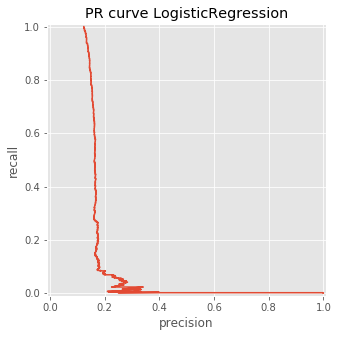

In [402]:
%matplotlib inline
from matplotlib import pyplot as plt
precision_lrn1, recall_lrn1, thresholds_lrn1 = precision_recall_curve(y_test, predict_proba_lrn1[:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision_lrn1, recall_lrn1)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve LogisticRegression')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [403]:
print ("Logistic Regression ROC AUC SCORE =", roc_auc_score(y_test, predict_proba_lrn1[:,1]))

Logistic Regression ROC AUC SCORE = 0.6108761042092093
